# Pipeline 5: Yolov8s + MangaOCR + ElanMTJAEn Batch

Contain errors, dont use this one

In [1]:
import os

ENDWITHS = 'Pipelines'

NOTEBOOK_DIR = os.getcwd()

if not NOTEBOOK_DIR.endswith(ENDWITHS):
    raise ValueError(f"Not in correct dir, expect end with {ENDWITHS}, but got {NOTEBOOK_DIR} instead")

BASE_DIR = os.path.join(NOTEBOOK_DIR, '..', '..','..')

In [2]:
import sys
import os

# Add the code directory to path
sys.path.insert(0, os.path.join(BASE_DIR, 'code'))

# Now import from pipeline directly (not code.pipeline)
from pipeline.SegmentationModels.YoloSeg import YoloSeg, plot_patch, plot_image
from pipeline.OCRModels.MangaOCRModel import MangaOCRModel
from pipeline.TranslationModels.ElanMtJaEnBatchTranslator import ElanMtJaEnBatchTranslator
from ultralytics import YOLO
import cv2
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
import numpy as np
from math import ceil, floor
import torch

In [3]:
#YOLO_MODEL_PATH = os.path.join(BASE_DIR, 'best.pt')
YOLO_MODEL_PATH = os.path.join(BASE_DIR, "models","bubble-detection","YOLO_Ultralytics","super_yolo.pt")

EX_IMG_PATH = os.path.join(BASE_DIR, "data/Manga109_released_2023_12_07/images/AisazuNihaIrarenai/007.jpg")
img = cv2.imread(EX_IMG_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
device = "cuda:1" if torch.cuda.is_available() else "cpu"

Model load complete
[[1272.7808837890625, 526.0335693359375, 1432.35595703125, 681.153564453125], [562.5657348632812, 49.398685455322266, 752.8712158203125, 235.4425506591797], [1445.746826171875, 535.5512084960938, 1568.2430419921875, 705.8297729492188], [1113.723876953125, 47.797203063964844, 1267.783447265625, 262.0365295410156], [356.9025573730469, 274.416259765625, 523.9561767578125, 513.4833984375], [573.4169311523438, 507.03973388671875, 721.3472900390625, 681.994873046875], [506.9709777832031, 711.2804565429688, 679.2034301757812, 969.623291015625], [168.2627410888672, 549.87548828125, 264.962158203125, 680.988525390625], [1146.943603515625, 887.6011352539062, 1307.90185546875, 1109.447265625], [1208.95751953125, 693.7040405273438, 1320.8822021484375, 819.8778076171875], [410.90838623046875, 724.07080078125, 483.7901306152344, 829.9888305664062], [1393.807861328125, 341.87066650390625, 1496.0660400390625, 501.8179931640625], [256.2027587890625, 519.2255249023438, 297.7514953613

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, T

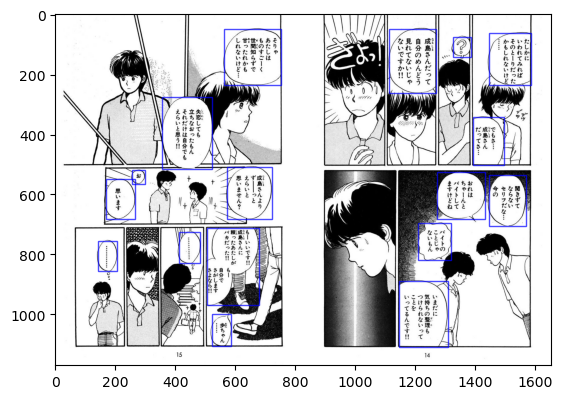

In [4]:
yolo_model = YoloSeg(YOLO_MODEL_PATH, verbose= False, device= device)
yolo_model.load_model()
image_rgb, bboxes, masks_tensor, probs= yolo_model.predict(img_rgb, device= device, print_bbox = True, plot = True, plot_bbox= True, verbose= False)
yolo_model.unload_model()

In [11]:
image_rgb = np.array(image_rgb)
cropped_image_list = []

for box in bboxes:
    cropped_image = image_rgb[ floor(box[1]): ceil(box[3]), floor(box[0]): ceil(box[2]), :]
    cropped_image_list.append(cropped_image)

text_ocr_list = []

manga_ocr_model = MangaOCRModel()
manga_ocr_model.load_model()

for cropped_img in cropped_image_list:
    text = manga_ocr_model.predict(cropped_img)
    text_ocr_list.append(text)

for text in text_ocr_list:
    print(text)

manga_ocr_model.unload_model()


2025-12-05 14:17:16.280 | INFO     | manga_ocr.ocr:__init__:16 - Loading OCR model from kha-white/manga-ocr-base
2025-12-05 14:17:19.841 | INFO     | manga_ocr.ocr:__init__:28 - Using CPU
2025-12-05 14:17:20.891 | INFO     | manga_ocr.ocr:__init__:35 - OCR ready


TypeError: MangaOCRModel.predict() missing 1 required positional argument: 'bboxes'

In [6]:
import time

model_trans = ElanMtJaEnBatchTranslator()
model_trans.load_model()

Loading Mitsua/elan-mt-tiny-ja-en to cpu...


In [7]:
start = time.time()

clean_texts = [
    t[0] if isinstance(t, (list, tuple)) else t
    for t in text_ocr_list
]
text_translated_list = model_trans.predict(clean_texts)

print("Time taken: ", time.time() - start)

for i, (ocr, trans) in enumerate(zip(text_ocr_list, text_translated_list)):
    print(f"Bbox {i}")
    print(ocr)
    print(trans,"\n")

Time taken:  0.39000940322875977
Bbox 0
['それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、']
Still, 

Bbox 1
['それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、']
Still, 

Bbox 2
['それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、']
Still, 

Bbox 3
['それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、']
Still, 

Bbox 4
['それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、']
Still, 

Bbox 5
['それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', 'それでも、', '

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, Takao, IPAexGothic, IPAPGothic, VL PGothic, Noto Sans CJK JP
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS, Hiragino Sans, Yu Gothic, Meiryo, T

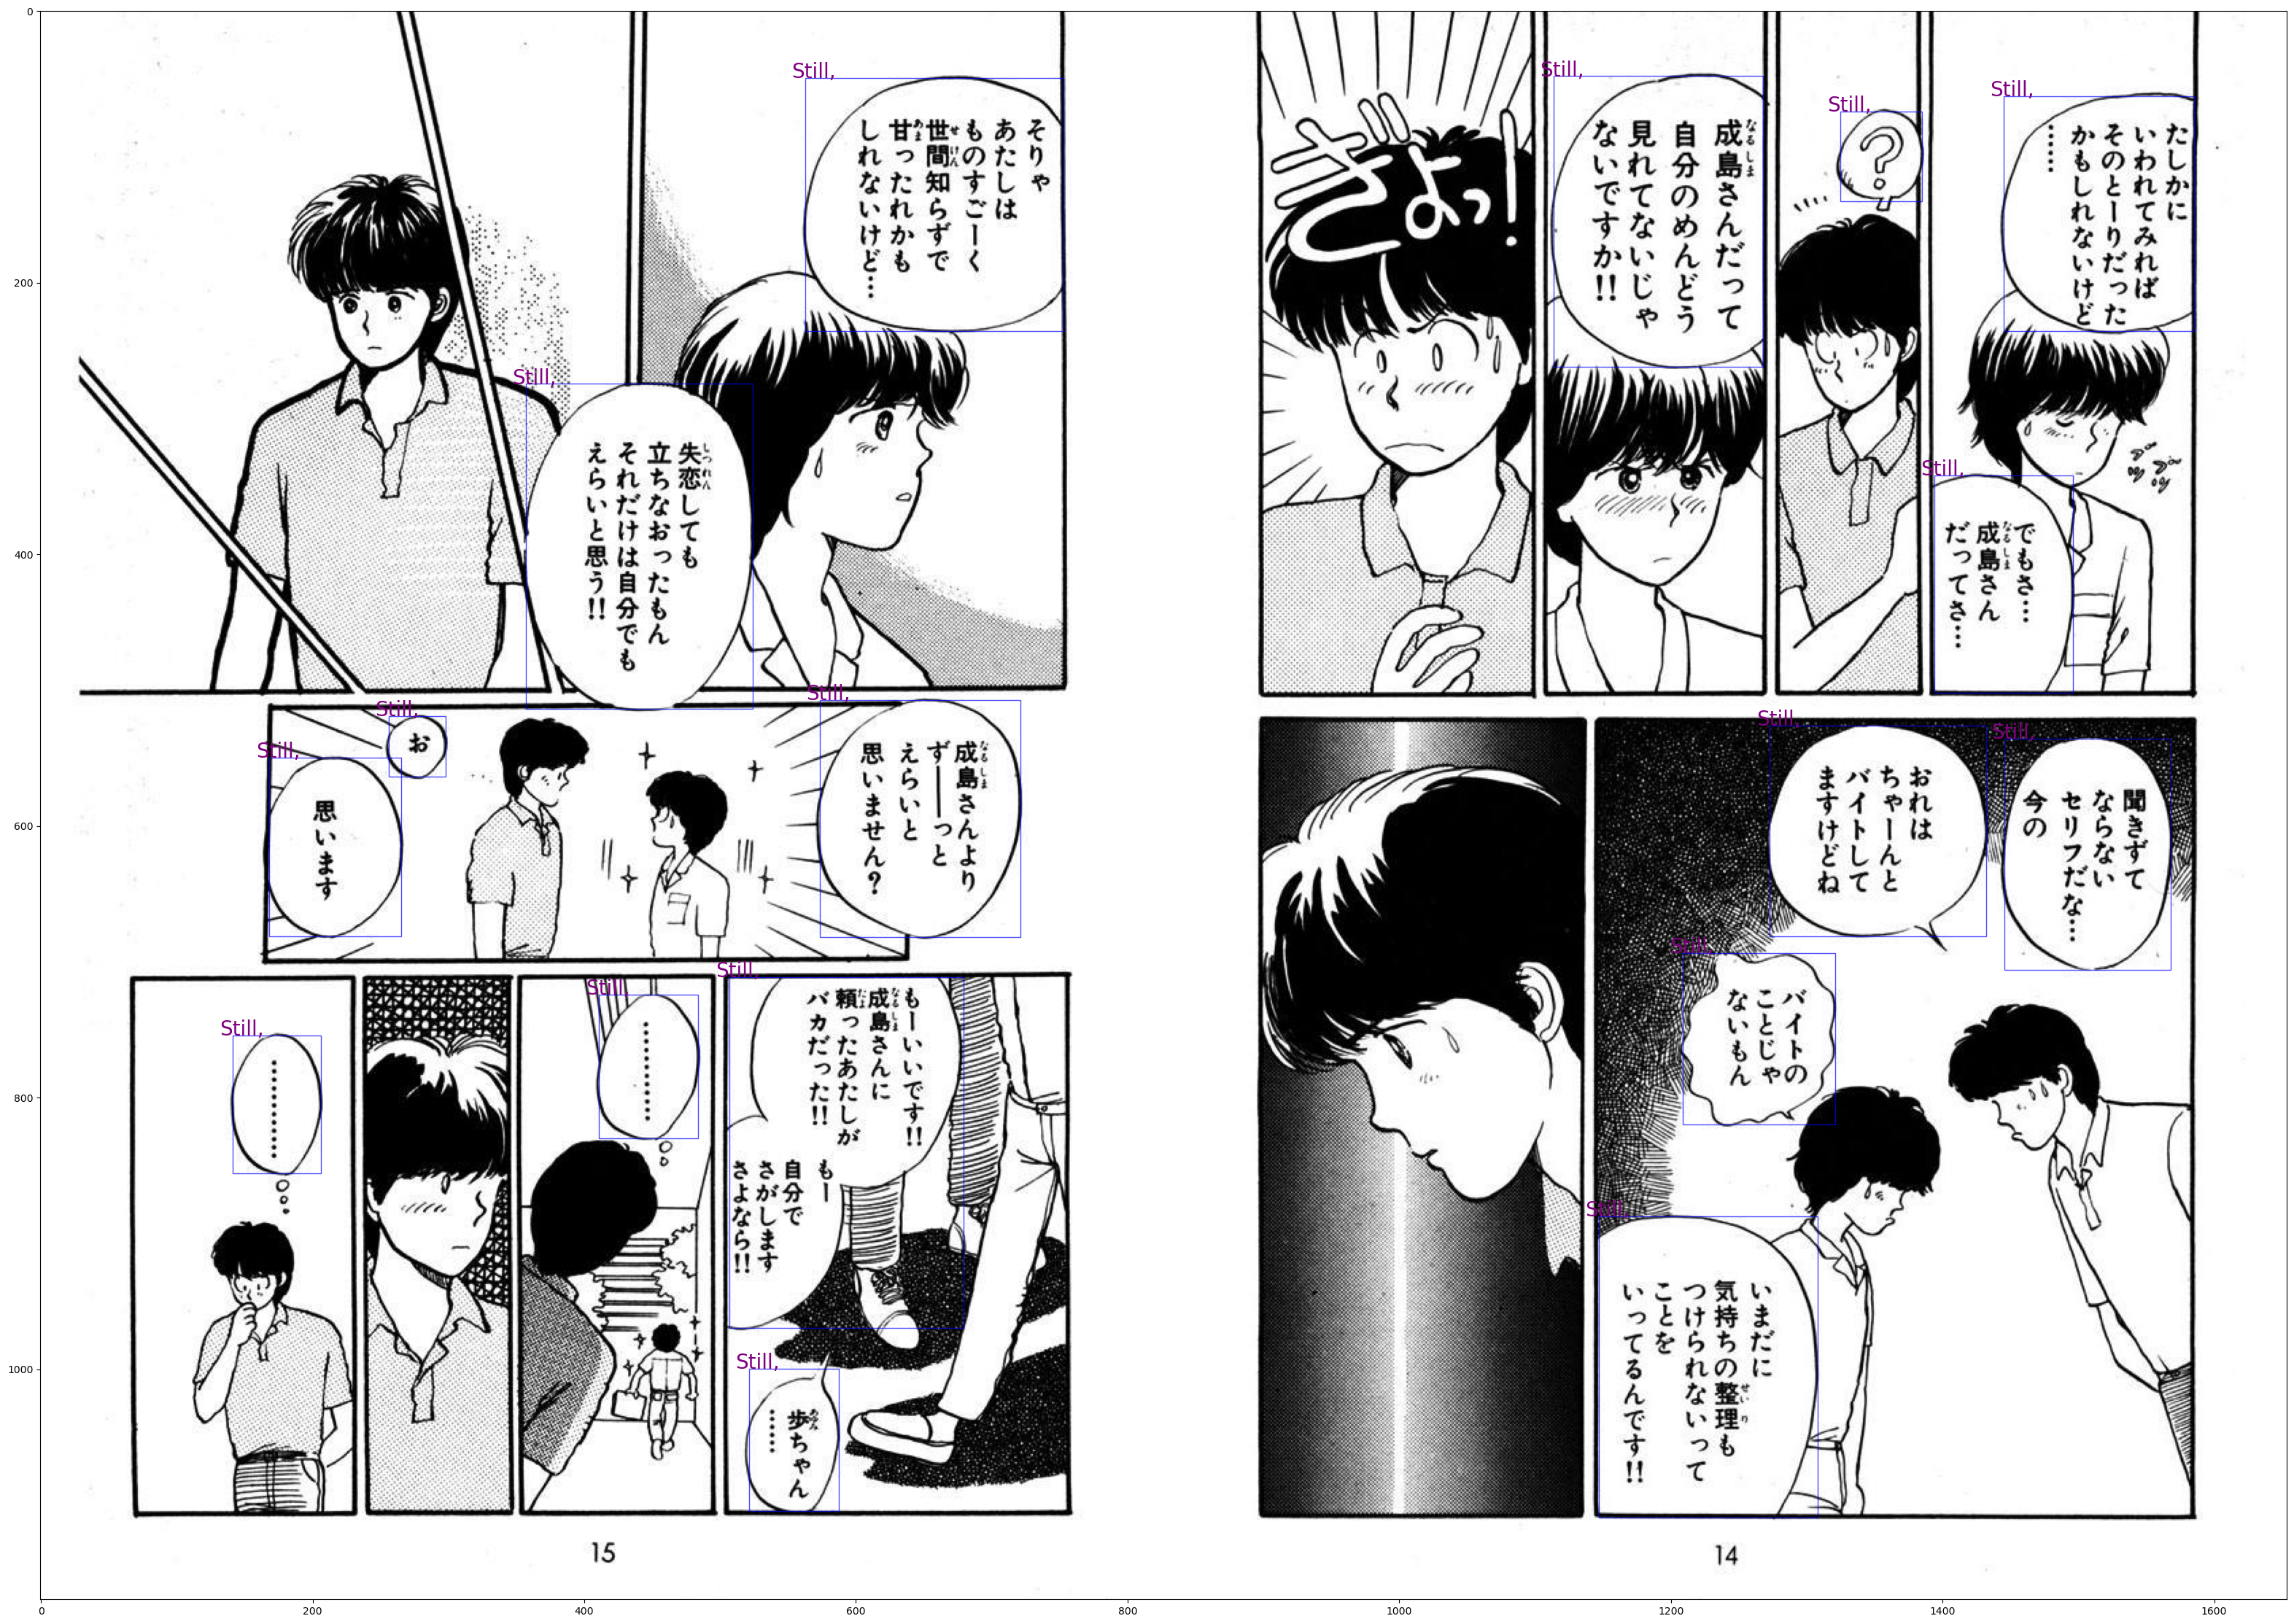

In [8]:
ratio = image_rgb.shape[1] / image_rgb.shape[0]
width = 40
height = width / ratio

fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax = plot_image(ax, image = image_rgb, boxes=bboxes, plot_bbox=True)

for box, ocr, trans in zip(bboxes, text_ocr_list, text_translated_list):
    # ax.text(x = box[0], y = box[3] + 15, s=ocr, fontsize=50, color="brown")
    ax.text(x = box[0] - 10, y = box[1], s=trans, fontsize=20, color="purple")
